In [581]:
# Using Natural Units
m = 1
omega = 1
hbarc = 197.326

l = 0
kappa = -l - 1

In [582]:
def f(r,u,v,l,E):

    f = v

    return f

def g(r,u,v,l,E):

   
    g =  ( (l * (l + 1) / r**2) + m**2 * omega**2 * r**2 ) * u + ( (2 * kappa - 1) * m * omega + m**2 - E**2 ) * u
        

    return g

In [583]:
def runge_kutta_coupled(r, u, v, l, E, h, n):


    for i in range(n-1):

        F1 = f(r[i], u[i], v[i], l, E)
        G1 = g(r[i], u[i], v[i], l, E)

        F2 = f(r[i] + ( h / 2. ), u[i] + F1 * ( h / 2. ), v[i] + G1 * ( h / 2. ), l, E)
        G2 = g(r[i] + ( h / 2. ), u[i] + F1 * ( h / 2. ), v[i] + G1 * ( h / 2. ), l, E)

        F3 = f(r[i] + ( h / 2. ), u[i] + F2 * ( h / 2. ), v[i] + G2 * ( h / 2. ), l, E)
        G3 = g(r[i] + ( h / 2. ), u[i] + F2 * ( h / 2. ), v[i] + G2 * ( h / 2. ), l, E)

        F4 = f(r[i] + h, u[i] + F3 * h, v[i] + G3 * h, l, E)
        G4 = g(r[i] + h, u[i] + F3 * h, v[i] + G3 * h, l, E)
        
        u[i + 1] = u[i] + ( h / 6. ) * (F1 + 2. * F2 + 2. * F3 + F4)
        v[i + 1] = v[i] + ( h / 6. ) * (G1 + 2. * G2 + 2. * G3 + G4)
        r[i + 1] = r[i] + h

In [584]:
E = 5**(1/2)

r_min = 1E-12
r_max = 6
n = 10000
h = (r_max - r_min) / n

r = [1E-6] * n
u = [0] * n 
v = [1] * n

runge_kutta_coupled(r, u, v, l, E, h, n)

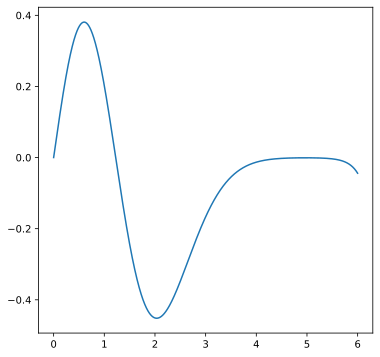

In [585]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rc('figure', figsize=(6, 6))

plt.plot(r,u)
# plt.xlim([0,20])